In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

#### Купа дурних дерев вчиться виправляти помилки один одного

- Bagging
    - [Random Forest](http://localhost:8889/notebooks/projects/machine_learning/Ensembles.ipynb#Choose-optimal-number-of-trees)
    - [Gradient Boosting]()
- Boosting
    - [AdaBoost]()
    - CatBoost
    - LightGBM
    - XGBoost
- Stacking

**Bagging** - Він же Bootstrap AGGregatING. Навчаємо один алгоритм багато разів на випадкових вибірках з вихідних даних. В кінці усереднюємо відповіді. На них ми навчаємо один і той же алгоритм кілька разів, а в кінці знаходимо відповідь простим голосуванням.

**Бустинг** - Навчаємо алгоритми послідовно, кожен наступний приділяє особливу увагу тим випадкам, на яких помилився попередній. Як в бегінгу, ми робимо вибірки з вихідних даних, але тепер не зовсім випадково. У кожну нову вибірку ми беремо частину тих даних, на яких попередній алгоритм відпрацював неправильно. Тобто - донавчаємо новий алгоритм на помилках попереднього.

**Стекінг** - Навчаємо кілька різних алгоритмів і передаємо їх результати на вхід останньому, який приймає остаточне рішення.

In [4]:
df = pd.read_csv("DATA/penguins_size.csv")

In [5]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [14]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [15]:
df = df.dropna()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


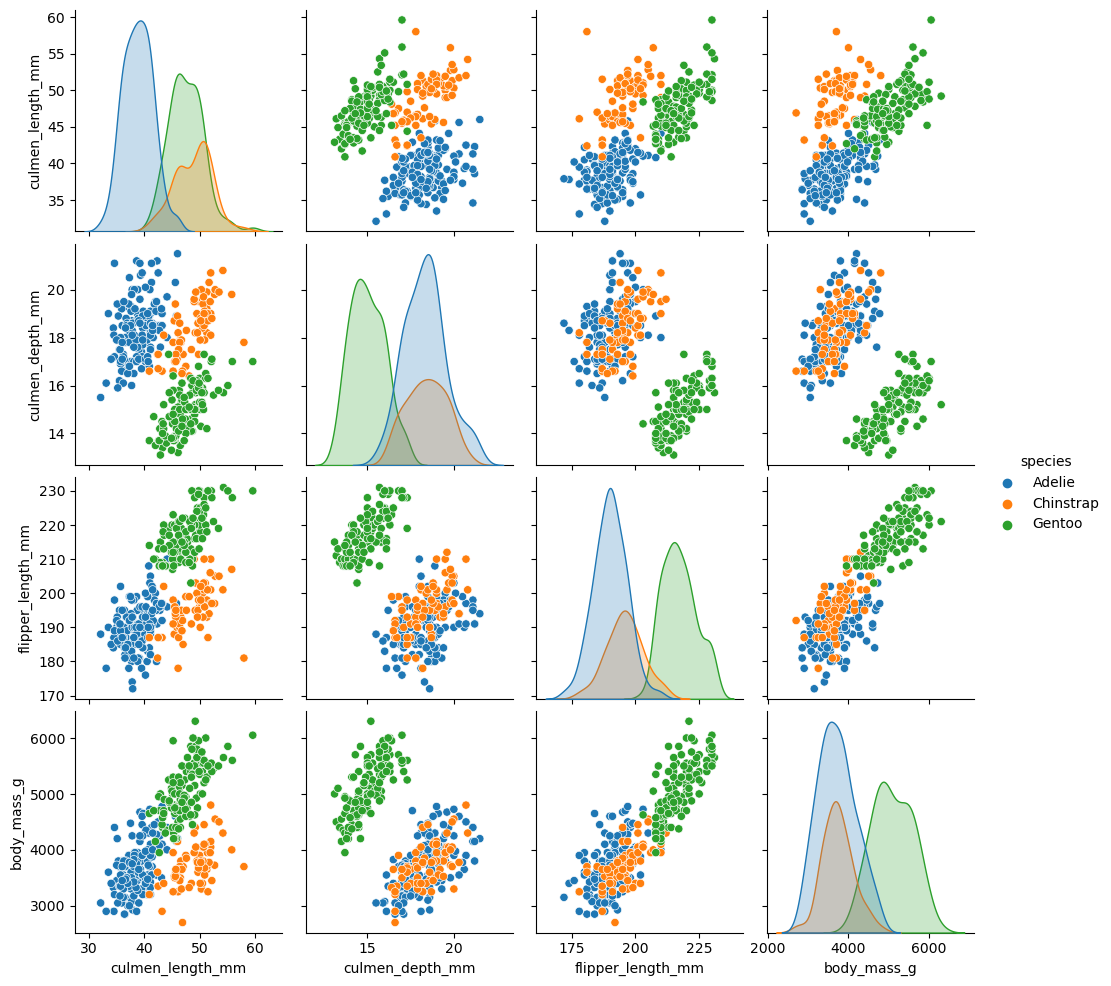

In [17]:
sns.pairplot(df, hue='species')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


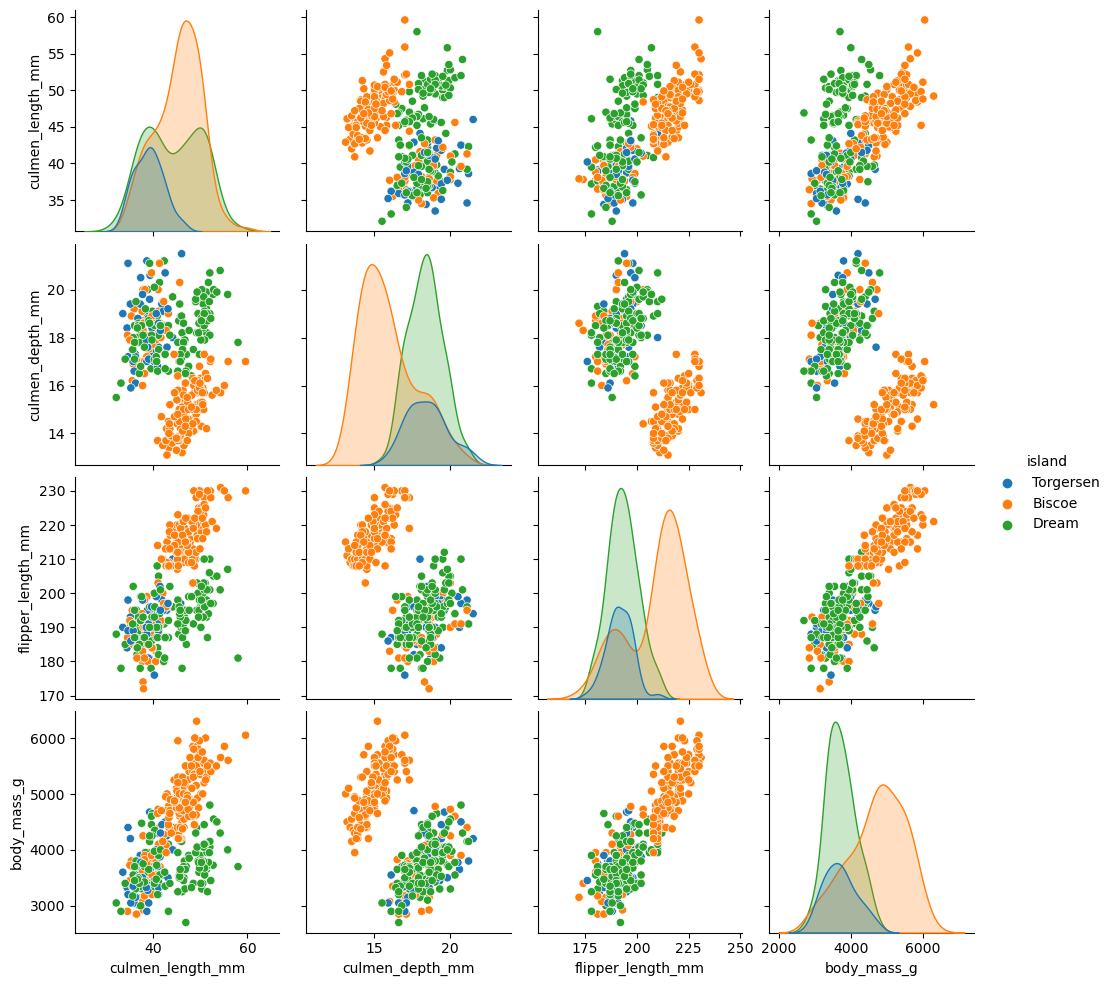

In [18]:
sns.pairplot(df, hue='island')

<Figure size 1000x600 with 0 Axes>

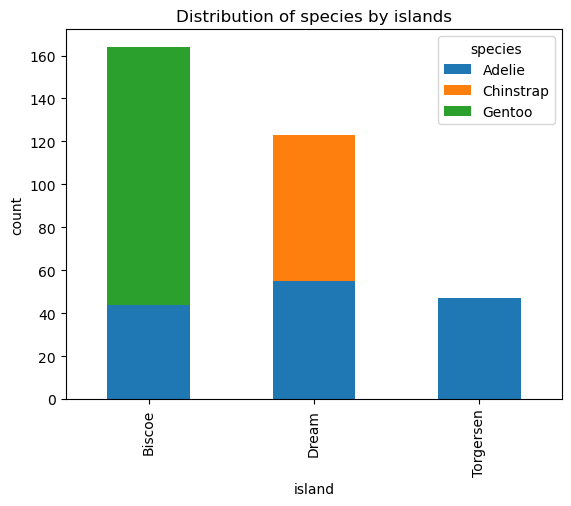

In [35]:
plt.figure(figsize=(10, 6)) 
df.groupby(['island', 'species']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Distribution of species by islands')
plt.xlabel('island')
plt.ylabel('count')
plt.legend(title='species', loc='upper right')
plt.show()

In [56]:
df['island'].unique()

In [24]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [25]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [60]:
X_test, X_verify, y_test, y_verify = train_test_split(X_test, y_test, test_size=0.5, random_state=101)

# Random Forest

In [61]:
# 10 trees
model = RandomForestClassifier(n_estimators=10, max_features='sqrt', random_state=101)
model.fit(X_train, y_train)
preds = model.predict(X_test)
preds

array(['Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo'], dtype=object)

In [62]:
confusion_matrix(preds, y_test)

array([[19,  1,  0],
       [ 0, 12,  0],
       [ 0,  0, 18]], dtype=int64)

In [63]:
accuracy_score(preds, y_test)

0.98

In [64]:
 model.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])

In [65]:
print(pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance']).sort_values('Feature Importance'))


                   Feature Importance
sex_MALE                     0.004226
sex_FEMALE                   0.006323
island_Torgersen             0.037201
culmen_depth_mm              0.101849
island_Dream                 0.145121
flipper_length_mm            0.173434
body_mass_g                  0.213170
culmen_length_mm             0.318677


In [67]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n, max_features='sqrt')
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds, y_test))

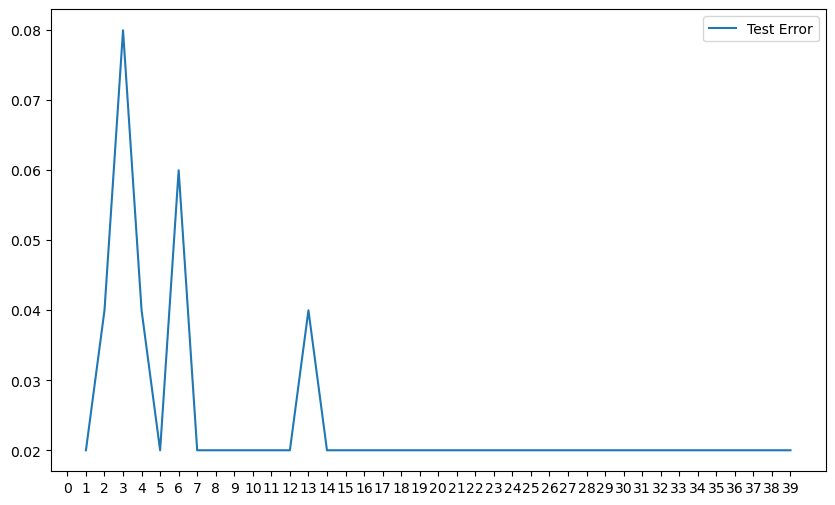

In [72]:
plt.figure(figsize=(10, 6)) 
plt.plot(range(1,40), test_error, label='Test Error')
plt.xticks(range(0, 40, 1))
plt.legend()

In [75]:
n_estimators = [64, 100, 128, 200]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]

param_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'bootstrap': bootstrap,
             'oob_score': oob_score}

In [79]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid)

grid.fit(X_train, y_train)

grid.best_params_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 417, in fit
    raise ValueError

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': True}

In [86]:
bs = grid.best_params_

final_model = Pipeline([('scaler', StandardScaler()), ('rfc', RandomForestClassifier(
    bootstrap=bs['bootstrap'],
    max_features=bs['max_features'],
    n_estimators=bs['n_estimators'],
    oob_score=bs['oob_score'],
))])
final_model.fit(X_train, y_train)
dump(final_model, 'random_forest.joblib') 
preds = final_model.predict(X_test)
confusion_matrix(preds, y_test)

array([[19,  1,  0],
       [ 0, 12,  0],
       [ 0,  0, 18]], dtype=int64)

In [83]:
accuracy_score(preds, y_test)

0.98

# Gradient Boosting

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

In [110]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}
gb_model = GradientBoostingClassifier()
grid = GridSearchCV(gb_model,param_grid)
grid.fit(X_train, y_train)
print('best_params_: ', grid.best_params_)
preds = grid.predict(X_test)
confusion_matrix(preds, y_test)

best_params_:  {'max_depth': 5, 'n_estimators': 20}


array([[19,  1,  0],
       [ 0, 12,  0],
       [ 0,  0, 18]], dtype=int64)

In [111]:
accuracy_score(preds, y_test)

0.98

In [115]:
bs = grid.best_params_
final_model = Pipeline([('scaler', StandardScaler()), ('gradient_boost', GradientBoostingClassifier(
    max_depth=bs['max_depth'],
    n_estimators=bs['n_estimators'],
))])
final_model.fit(X_train, y_train)
dump(final_model, 'gradient_boost.joblib') 

preds = final_model.predict(X_test)
confusion_matrix(preds, y_test)

array([[19,  1,  0],
       [ 0, 12,  0],
       [ 0,  0, 18]], dtype=int64)

In [114]:
accuracy_score(preds, y_test)

0.98

# AdaBoost

In [92]:
from sklearn.ensemble import AdaBoostClassifier

In [93]:
model = AdaBoostClassifier(n_estimators=1)
model.fit(X_train,y_train)
preds = model.predict(X_test)

print(confusion_matrix(preds, y_test))
print(accuracy_score(preds, y_test))

[[18 12  0]
 [ 0  0  0]
 [ 1  1 18]]
0.72


In [94]:
model.feature_importances_

array([0., 0., 1., 0., 0., 0., 0., 0.])

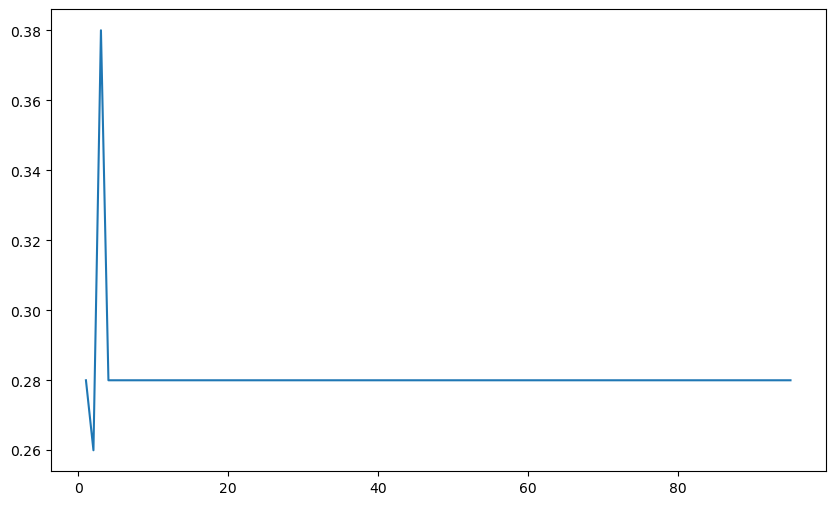

In [99]:
error_rates = []

for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

plt.figure(figsize=(10, 6)) 
plt.plot(range(1,96),error_rates)

In [102]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance']).sort_values('Importance')

,Importance
culmen_length_mm,0.000000
island_Dream,0.000000
island_Torgersen,0.000000
sex_FEMALE,0.000000
sex_MALE,0.000000
body_mass_g,0.010526
culmen_depth_mm,0.494737
flipper_length_mm,0.494737


In [107]:
final_model = Pipeline([('scaler', StandardScaler()), ('ada', AdaBoostClassifier(n_estimators=5))])
final_model.fit(X_train, y_train)
dump(final_model, 'ada_boosting.joblib') 
preds = final_model.predict(X_test)
print(confusion_matrix(preds, y_test))
print(accuracy_score(preds, y_test))

[[18 12  0]
 [ 1  0  0]
 [ 0  1 18]]
0.72


# Use saved models

In [91]:
loaded_model = load('random_forest.joblib')
predicted_random_forest = loaded_model.predict(X_verify)
print(confusion_matrix(predicted_random_forest, y_verify))
print(accuracy_score(predicted_random_forest, y_verify))

[[22  0  0]
 [ 0 10  0]
 [ 0  0 19]]
1.0


In [117]:
loaded_model = load('gradient_boost.joblib')
predicted_gradient_boost = loaded_model.predict(X_verify)
print(confusion_matrix(predicted_gradient_boost, y_verify))
print(accuracy_score(predicted_gradient_boost, y_verify))

[[22  0  0]
 [ 0 10  0]
 [ 0  0 19]]
1.0


In [108]:
loaded_model = load('ada_boosting.joblib')
predicted_ada_boosting = loaded_model.predict(X_verify)
print(confusion_matrix(predicted_ada_boosting, y_verify))
print(accuracy_score(predicted_ada_boosting, y_verify))

[[22  9  0]
 [ 0  1  0]
 [ 0  0 19]]
0.8235294117647058
